In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# - Load customer data.
customers = pd.read_csv('C:/Users/Admin/Downloads/UL/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# - Check the number of cells in each column with null values.
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

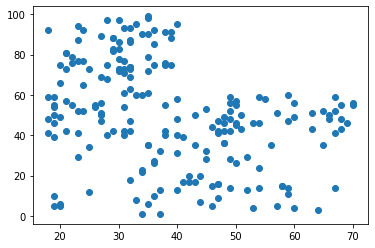

In [7]:
# - Create a scatter plot with Age as X and Spending Score as Y.
plt.scatter(customers['Age'], customers['Spending Score (1-100)'])
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
X = customers[['Age', 'Spending Score (1-100)']]

In [13]:
wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


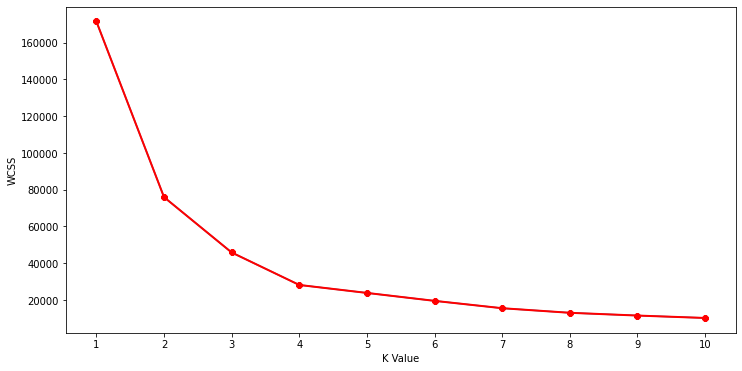

In [17]:
# The elbow curve

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [26]:
# Taking 5 clusters
km1 = KMeans(n_clusters=5) 

#Fitting the input data
km1.fit(X) 

#predicting the labels of the input data
y = km1.predict(X)

#adding the labels to a column named label
customers["label"] = y

#The new dataframe with the clustering done
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


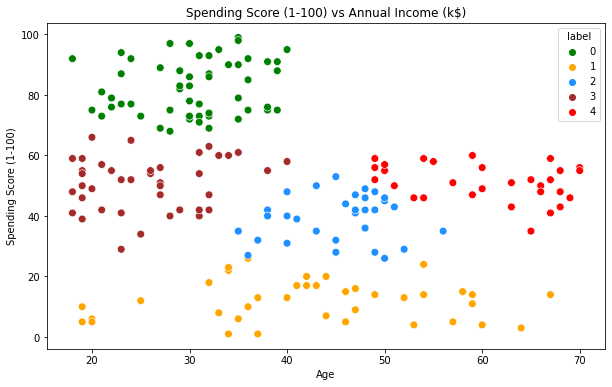

In [28]:
# Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','dodgerblue','brown','red'], legend='full',data = customers,s = 60 )
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()